## **Data Analysis for Memorable / Tekal-AI**

#### Second Section for Recruitment Challenge: *Deep Analysis*

#### Context: 

Memorable / Tekal-AI is currently developing tools based on AI models to assess the cognitive impact of videos and images. Client's assets data is analyzed in order understand the memorability and saliency metrics.

#### Analytical Context:
The case is structured as:
- Analyze the input database and identify potential problems.
- Conduct exploratory data analysis to determine which features seem to account for most of the Score Metrics.
- Develop Models to predict and explain the behaivor of Score Metrics.

**Import Libraries**

In [277]:
# IMPORT CLASICAL DATA ANALYSIS / DATA SCIENCE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
# Augmented Dickey-Fuller test to determine how strongly a time series is defined by a trend
from statsmodels.tsa.stattools import adfuller

# IMPORT SQL LIBRARIES
import sqlalchemy
import sqlite3 as db

from sqlalchemy import MetaData
from sqlalchemy_schemadisplay import create_schema_graph

**Create connection to SQLite Database**

In [2]:
#Let's try using sqlite3 as suggested
conn = db.connect("data/mock_db_v2.db")

In order to Analyse the impact of each feature to the Score Metrics It is necessary to build a single table of Observations

Score Metrics are:
- oohScore (After a short google search I found out this is an Acronym for *Out of Home* or Traditional Media Advertisement Like Billboards https://en.wikipedia.org/wiki/Out-of-home_advertising)
- smScore
- tvScore

These metrics are on the "Asset" table, which contains 800 observations/rows

According the relationship of Keys on each table from the database, the next query delivers a single dataframe with the most amount of observations for Score Metrics and Features:

In [205]:
Query= """SELECT *
FROM
  (SELECT Q1.ASSETID,Q1.ASSETID,
             Q1.ASSETTYPEID,
             Q1.NAME,
             Q1.ID,AC.ID,AC.CREATEDAT,AC.UPDATEDAT,AC.ASSETID,AC.COLOR,AC.COVERAGE
   FROM
     (SELECT AAT.ASSETID,
             AAT.ASSETTYPEID,
             AT.NAME,
             AT.ID
      FROM ASSET_ASSET_TYPES AAT
      INNER JOIN ASSET_TYPE AT ON AT.ID=AAT.ASSETTYPEID) Q1
   INNER JOIN ASSET_COLOR AC ON AC.ASSETID = Q1.ASSETID) Q2
INNER JOIN ASSET A ON A.ID = Q2.ASSETID"""

df=pd.read_sql(Query,con=conn)
df

,ASSETID,ASSETID:1,ASSETTYPEID,NAME,ID,ID:1,CREATEDAT,UPDATEDAT,ASSETID:2,COLOR,...,smScore,tvcScore,widthPx,heightPx,userId,deletedAt,status,parentAssetTypeId,publishedAt,scraped
0,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01FX34K9DD3D4X3QKXT3TT69ZE,01G2YQB5RR17QS3824HQXJE6V4,2022-05-13 12:47:22.159531,2022-05-13 12:47:22.159531,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,Light Gray,...,71.9500,68.0782,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:36.976424,0
1,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01FX34K9DD3D4X3QKXT3TT69ZE,01G2YQB5RR48751M0R9PACK1V5,2022-05-13 12:47:22.158055,2022-05-13 12:47:22.158055,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,White,...,71.9500,68.0782,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:36.976424,0
2,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01FX34K9DD3D4X3QKXT3TT69ZE,01G2YQB5RRQC3C3024HE3V28JK,2022-05-13 12:47:22.16095,2022-05-13 12:47:22.16095,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,Khaki,...,71.9500,68.0782,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:36.976424,0
3,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01FX34K9DD3D4X3QKXT3TT69ZE,01G2YQB5RRWG8V1B4JSFHXF4HA,2022-05-13 12:47:22.156237,2022-05-13 12:47:22.156237,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,Beige,...,71.9500,68.0782,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:36.976424,0
4,E0D01G0TGSPXF933E41FSG4ATYW0WFQW,E0D01G0TGSPXF933E41FSG4ATYW0WFQW,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01FX34K9DD3D4X3QKXT3TT69ZE,01G2YQB63KFF29W4Y36MZ1NFHG,2022-05-13 12:47:22.40179,2022-05-13 12:47:22.40179,E0D01G0TGSPXF933E41FSG4ATYW0WFQW,Gray,...,71.9500,76.9291,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:37.095722,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01FX34K9DDWM39GGYPGW2AF32A,01G2YQBK7N0AE2YHQ87YB2ZXNS,2022-05-13 12:47:35.886489,2022-05-13 12:47:35.886489,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,Steel Blue,...,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0
872,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01FX34K9DDWM39GGYPGW2AF32A,01G2YQBK7N33NGDRDV0S996AQ0,2022-05-13 12:47:35.884683,2022-05-13 12:47:35.884683,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,Light Blue,...,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0
873,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01FX34K9DDWM39GGYPGW2AF32A,01G2YQBK7N6XWJTSSS92JC4AGB,2022-05-13 12:47:35.890981,2022-05-13 12:47:35.890981,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,Green,...,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0
874,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01FX34K9DDWM39GGYPGW2AF32A,01G2YQBK7NB3NC6JKDQ7APFP08,2022-05-13 12:47:35.88791,2022-05-13 12:47:35.88791,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,Light Gray,...,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0


## Exploratory Data Analysis

Now lets delete duplicated Columns:

In [206]:
df=df.loc[:,~df.apply(lambda x: x.duplicated(),axis=1).all()].copy()

Let's check null records of each columns

In [207]:
df.isnull().sum().sort_values(ascending=False)

deletedAt            874
duration             865
frameCount           865
framesPerSecond      865
campaignId           555
publishedAt            0
parentAssetTypeId      0
status                 0
userId                 0
heightPx               0
widthPx                0
tvcScore               0
smScore                0
oohScore               0
brandId                0
ASSETID                0
ASSETTYPEID            0
mimeType               0
fileType               0
sectorId               0
updatedAt              0
createdAt              0
name                   0
COVERAGE               0
COLOR                  0
CREATEDAT              0
ID:1                   0
NAME                   0
scraped                0
dtype: int64

As the distribution of null records is likely the same (867.25 on average) for deletedAt, duration, frameCount, framesPerSecond, I decide to drop those columns.

In [208]:
df=df.drop(['deletedAt', 'duration', 'frameCount', 'framesPerSecond'],axis=1)
df

,ASSETID,ASSETTYPEID,NAME,ID:1,CREATEDAT,COLOR,COVERAGE,name,createdAt,updatedAt,...,oohScore,smScore,tvcScore,widthPx,heightPx,userId,status,parentAssetTypeId,publishedAt,scraped
0,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01G2YQB5RR17QS3824HQXJE6V4,2022-05-13 12:47:22.159531,Light Gray,0.168125,Duke's Mayonnaise_10160460751008291_1649898692...,2022-04-17 01:04:36.976424,2022-04-17 01:05:25.961848,...,83.7600,71.9500,68.0782,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:36.976424,0
1,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01G2YQB5RR48751M0R9PACK1V5,2022-05-13 12:47:22.158055,White,0.319219,Duke's Mayonnaise_10160460751008291_1649898692...,2022-04-17 01:04:36.976424,2022-04-17 01:05:25.961848,...,83.7600,71.9500,68.0782,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:36.976424,0
2,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01G2YQB5RRQC3C3024HE3V28JK,2022-05-13 12:47:22.16095,Khaki,0.103906,Duke's Mayonnaise_10160460751008291_1649898692...,2022-04-17 01:04:36.976424,2022-04-17 01:05:25.961848,...,83.7600,71.9500,68.0782,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:36.976424,0
3,PFD01G0TGSPX7VXM9KHWW9DNVR5ASDNÑ,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01G2YQB5RRWG8V1B4JSFHXF4HA,2022-05-13 12:47:22.156237,Beige,0.125469,Duke's Mayonnaise_10160460751008291_1649898692...,2022-04-17 01:04:36.976424,2022-04-17 01:05:25.961848,...,83.7600,71.9500,68.0782,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:36.976424,0
4,E0D01G0TGSPXF933E41FSG4ATYW0WFQW,01FX34K9DD3D4X3QKXT3TT69ZE,Facebook,01G2YQB63KFF29W4Y36MZ1NFHG,2022-05-13 12:47:22.40179,Gray,0.130156,Duke's Mayonnaise_10160451735808291_1649597820...,2022-04-17 01:04:37.095722,2022-04-17 01:05:26.249992,...,82.2400,71.9500,76.9291,1200,800,01FYEMPG5PQXT3FFTZAK0G9WHG,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-17 01:04:37.095722,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQBK7N0AE2YHQ87YB2ZXNS,2022-05-13 12:47:35.886489,Steel Blue,0.172460,heinz_2596173459380191217_1623708039.mp4,2022-04-28 18:22:44.188373,2022-04-28 18:24:53.967837,...,72.2284,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0
872,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQBK7N33NGDRDV0S996AQ0,2022-05-13 12:47:35.884683,Light Blue,0.328493,heinz_2596173459380191217_1623708039.mp4,2022-04-28 18:22:44.188373,2022-04-28 18:24:53.967837,...,72.2284,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0
873,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQBK7N6XWJTSSS92JC4AGB,2022-05-13 12:47:35.890981,Green,0.109567,heinz_2596173459380191217_1623708039.mp4,2022-04-28 18:22:44.188373,2022-04-28 18:24:53.967837,...,72.2284,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0
874,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQBK7NB3NC6JKDQ7APFP08,2022-05-13 12:47:35.88791,Light Gray,0.166351,heinz_2596173459380191217_1623708039.mp4,2022-04-28 18:22:44.188373,2022-04-28 18:24:53.967837,...,72.2284,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0


In [225]:
df.updatedAt

0     2022-04-17 01:05:25.961848
1     2022-04-17 01:05:25.961848
2     2022-04-17 01:05:25.961848
3     2022-04-17 01:05:25.961848
4     2022-04-17 01:05:26.249992
                 ...            
871   2022-04-28 18:24:53.967837
872   2022-04-28 18:24:53.967837
873   2022-04-28 18:24:53.967837
874   2022-04-28 18:24:53.967837
875   2022-04-28 18:24:53.967837
Name: updatedAt, Length: 876, dtype: datetime64[ns]

To improve the readability of the columns-names let's change the repeated or confusable 

In [211]:
df.rename(columns={'NAME':'Asset_Type_Name','ID:1':'ID','name':'Filename','CREATEDAT':'CREATEDAT_COLOR'},inplace=True)

Let's take a look about the null values from campaignId Column

In [212]:
df.loc[df.campaignId.isnull()]

,ASSETID,ASSETTYPEID,Asset_Type_Name,ID,CREATEDAT_COLOR,COLOR,COVERAGE,Filename,createdAt,updatedAt,...,oohScore,smScore,tvcScore,widthPx,heightPx,userId,status,parentAssetTypeId,publishedAt,scraped
46,AR201G1189TKGYK4RPC2NFYPE0D7FNPÑ,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQ95BQE6Q1E58BNW8FH13A,2022-05-13 12:46:16.190948,Sienna,0.110156,dukes_mayonnaise_2654928180444767140_163071212...,2022-04-19 15:50:49.662511,2022-04-19 17:24:13.644575,...,69.3200,54.1500,50.8055,1080,810,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2021-09-03 20:35:23,0
47,AR201G1189TKGYK4RPC2NFYPE0D7FNPÑ,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQ95BQGS36G69VF8B4P8RY,2022-05-13 12:46:16.192659,Black,0.221406,dukes_mayonnaise_2654928180444767140_163071212...,2022-04-19 15:50:49.662511,2022-04-19 17:24:13.644575,...,69.3200,54.1500,50.8055,1080,810,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2021-09-03 20:35:23,0
48,AR201G1189TKGYK4RPC2NFYPE0D7FNPÑ,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQ95BQN0ZKAGV8KBWFD3AJ,2022-05-13 12:46:16.189208,Green,0.126406,dukes_mayonnaise_2654928180444767140_163071212...,2022-04-19 15:50:49.662511,2022-04-19 17:24:13.644575,...,69.3200,54.1500,50.8055,1080,810,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2021-09-03 20:35:23,0
49,AR201G1189TKGYK4RPC2NFYPE0D7FNPÑ,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQ95BQPYZ6Q51AA2209CQM,2022-05-13 12:46:16.187548,White,0.126719,dukes_mayonnaise_2654928180444767140_163071212...,2022-04-19 15:50:49.662511,2022-04-19 17:24:13.644575,...,69.3200,54.1500,50.8055,1080,810,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2021-09-03 20:35:23,0
50,ÑFN01G1189TKJ7WS7T97SXY0RFM15I9P,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQ95MA10FZBE17ZE1HTTRN,2022-05-13 12:46:16.443003,Light Blue,0.370625,dukes_mayonnaise_2655346415092184951_163076198...,2022-04-19 15:50:49.674895,2022-04-19 17:24:13.639451,...,69.4900,53.1000,56.6236,1080,1080,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2021-09-04 10:26:21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQBK7N0AE2YHQ87YB2ZXNS,2022-05-13 12:47:35.886489,Steel Blue,0.172460,heinz_2596173459380191217_1623708039.mp4,2022-04-28 18:22:44.188373,2022-04-28 18:24:53.967837,...,72.2284,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0
872,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQBK7N33NGDRDV0S996AQ0,2022-05-13 12:47:35.884683,Light Blue,0.328493,heinz_2596173459380191217_1623708039.mp4,2022-04-28 18:22:44.188373,2022-04-28 18:24:53.967837,...,72.2284,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0
873,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQBK7N6XWJTSSS92JC4AGB,2022-05-13 12:47:35.890981,Green,0.109567,heinz_2596173459380191217_1623708039.mp4,2022-04-28 18:22:44.188373,2022-04-28 18:24:53.967837,...,72.2284,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0
874,FAQ01G1RPJFCPYCWF3V4WQ8B5Z6KHIEE,01FX34K9DDWM39GGYPGW2AF32A,Instagram,01G2YQBK7NB3NC6JKDQ7APFP08,2022-05-13 12:47:35.88791,Light Gray,0.166351,heinz_2596173459380191217_1623708039.mp4,2022-04-28 18:22:44.188373,2022-04-28 18:24:53.967837,...,72.2284,68.3047,37.6405,720,900,01FX343ZMKRE343QJJY7ETBEJ5,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-04-28 00:00:00,0


As the proportion of Null values from CampaignId is high (63%) and the data from the other columns on those records are valuable, I am not going to drop them. Therefore, let's find a strategy to replace those Null values

In [213]:

df.fillna(value=np.nan, inplace=True)
print (df.duplicated().any())
#there are no duplicated rows


False


First lets separate the continous variables and categorical features.

pandas correlation matrix 

Since correlations are best suited for analyzing linear relationships, let's create a matrix of 2D scatterplots for each pair of variables also, so that we can visually pick up on any potential non-linear relationships

In [226]:
df.corr()

,COVERAGE,oohScore,smScore,tvcScore,widthPx,heightPx,scraped
COVERAGE,1.000000,0.096703,0.065822,0.134008,0.007918,0.038982,NaN
oohScore,0.096703,1.000000,0.921892,0.882717,0.017718,0.049575,NaN
smScore,0.065822,0.921892,1.000000,0.786527,0.036126,0.072150,NaN
tvcScore,0.134008,0.882717,0.786527,1.000000,-0.052336,0.032187,NaN
widthPx,0.007918,0.017718,0.036126,-0.052336,1.000000,0.714679,NaN
heightPx,0.038982,0.049575,0.072150,0.032187,0.714679,1.000000,NaN
scraped,NaN,NaN,NaN,NaN,NaN,NaN,NaN


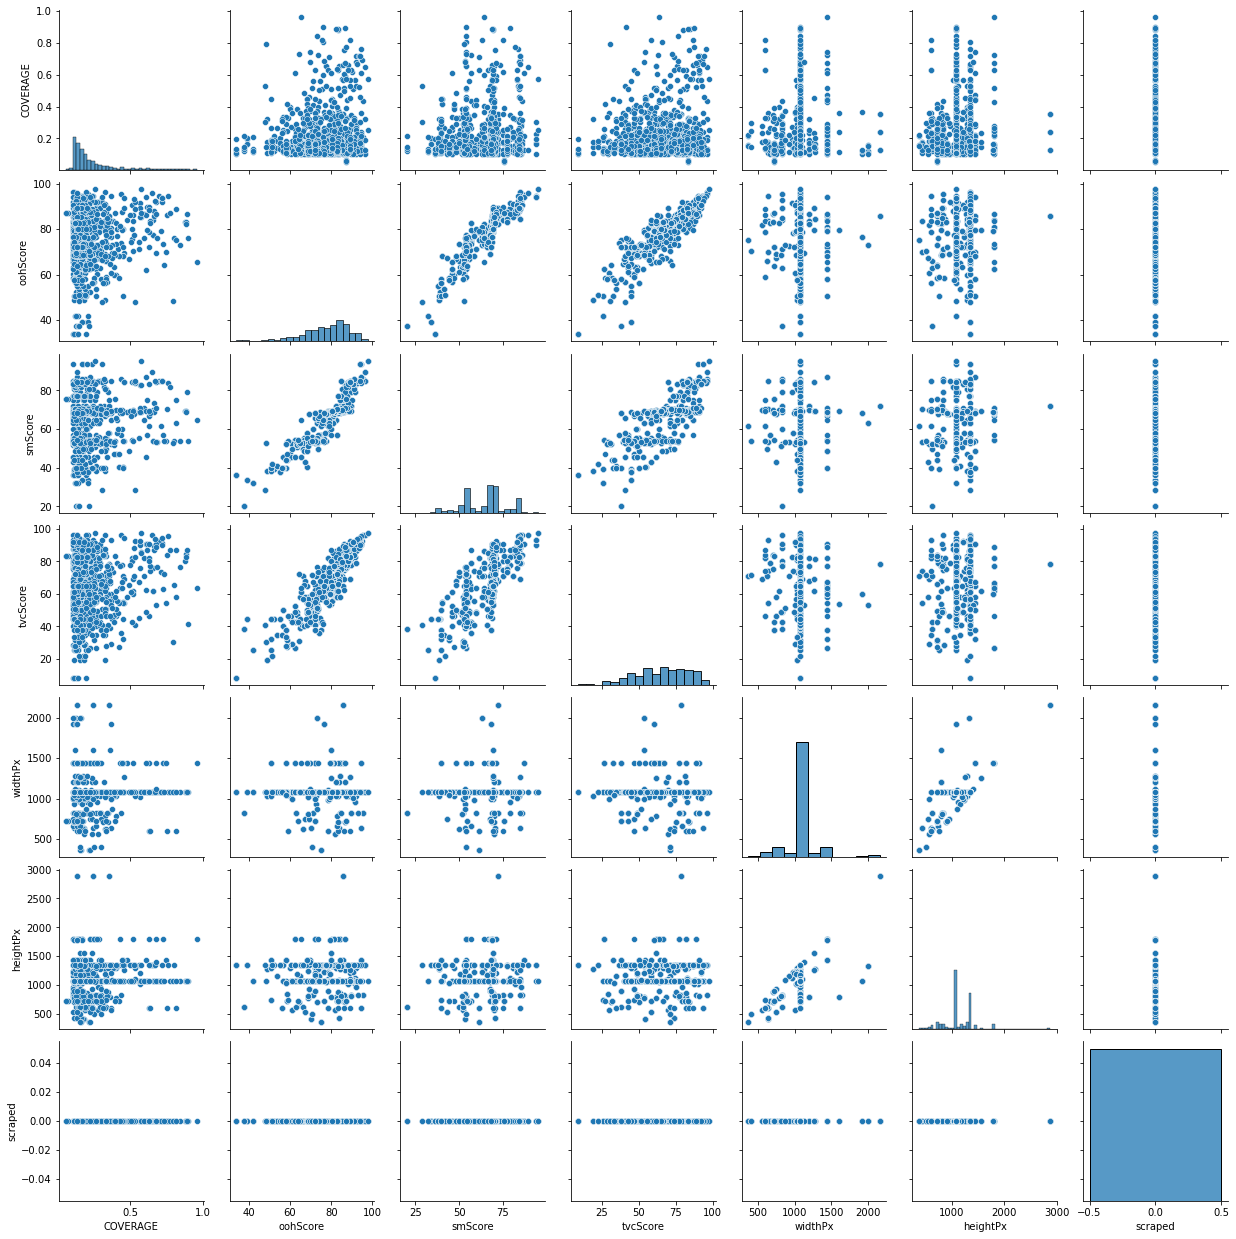

In [218]:
sns.pairplot(df)

In [227]:
#lets change the dtype for remaining features

df.ASSETID=df.ASSETID.astype('category')
df.ASSETTYPEID=df.ASSETTYPEID.astype('category')
df.Asset_Type_Name=df.Asset_Type_Name.astype('category')
df.ID=df.ID.astype('category')
df.publishedAt=pd.to_datetime(df.publishedAt,format='%Y-%m-%dT%H:%M:%S.%f')
df.CREATEDAT_COLOR=pd.to_datetime(df.CREATEDAT_COLOR,format='%Y-%m-%dT%H:%M:%S.%f')
df.createdAt=pd.to_datetime(df.createdAt,format='%Y-%m-%dT%H:%M:%S.%f')
df.updatedAt=pd.to_datetime(df.updatedAt,format='%Y-%m-%dT%H:%M:%S.%f')
df.COLOR=df.COLOR.astype('category')
df.Filename=df.Filename.astype('category')
df.campaignId=df.campaignId.astype('category')
df.sectorId=df.sectorId.astype('category')
df.fileType=df.fileType.astype('category')
df.mimeType=df.mimeType.astype('category')
df.brandId=df.brandId.astype('category')
df.parentAssetTypeId=df.parentAssetTypeId.astype('category')



To have a better understanding about the DateTime Columns let's create some Time Trend Graphs and check how the Metrics Columns Behave over time
We need to determine if Score Metrics (Dependant Variables) are **Stationary** or **Non-Stationary** in order to validate the key assumptions of Linear Regression.

<AxesSubplot:xlabel='publishedAt'>

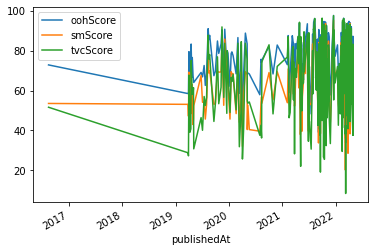

In [269]:
df[['publishedAt','oohScore','smScore','tvcScore']].sort_values(by=['publishedAt']).set_index('publishedAt').plot(y=['oohScore','smScore','tvcScore'])

<AxesSubplot:xlabel='publishedAt'>

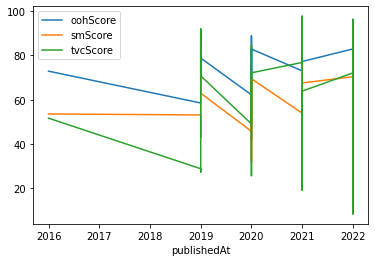

In [298]:
temp=df[['publishedAt','oohScore','smScore','tvcScore']].sort_values(by=['publishedAt'])
temp['publishedAt']=temp['publishedAt'].dt.year
temp[['publishedAt','oohScore','smScore','tvcScore']].set_index('publishedAt').plot(y=['oohScore','smScore','tvcScore'])

The Augmented Dickey-Fuller test is a type of statistical test that determines how strongly a time series is defined by a trend


- **Null Hypothesis (H0):** If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

- **Alternate Hypothesis (H1):** The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.


In [299]:
def adfull_test(L):
	
	for i in range(L.shape[1]):
		print ("\n Augmented Dickey-Fuller test for {} \n".format(L.columns[i]))
		X = L.iloc[:,i]
		result = adfuller(X)
		print('ADF Statistic: %f' % result[0])
		print('p-value: %f' % result[1])
		print('Critical Values:')
		for key, value in result[4].items():
			if result[0]< value:
				print('\t{}: {} \t Fail to Reject the null Hypothesis on {} confidence level'.format(key,value,100-int(key[:-1])))
			else:
				print('\t{}: {} \t Reject the null Hypothesis on {} confidence level'.format(key,value,100-int(key[:-1])))
		
adfull_test(temp[['oohScore','smScore','tvcScore']])
		


 Augmented Dickey-Fuller test for oohScore 

ADF Statistic: -9.564884
p-value: 0.000000
Critical Values:
	1%: -3.4378800537375045 	 Fail to Reject the null Hypothesis on 99 confidence level
	5%: -2.864864011317803 	 Fail to Reject the null Hypothesis on 95 confidence level
	10%: -2.5685399483682003 	 Fail to Reject the null Hypothesis on 90 confidence level

 Augmented Dickey-Fuller test for smScore 

ADF Statistic: -9.631482
p-value: 0.000000
Critical Values:
	1%: -3.4378800537375045 	 Fail to Reject the null Hypothesis on 99 confidence level
	5%: -2.864864011317803 	 Fail to Reject the null Hypothesis on 95 confidence level
	10%: -2.5685399483682003 	 Fail to Reject the null Hypothesis on 90 confidence level

 Augmented Dickey-Fuller test for tvcScore 

ADF Statistic: -9.823393
p-value: 0.000000
Critical Values:
	1%: -3.4378800537375045 	 Fail to Reject the null Hypothesis on 99 confidence level
	5%: -2.864864011317803 	 Fail to Reject the null Hypothesis on 95 confidence level
	10%

**CONLUSION:**
- *After testing the 3 Metrics of Score for stationarity, we can feel secure about the regression process.*

- The next graph were made just to have a better understading about additional Datetime Columns. After checking them on more detail, one can conclude that those dates are more related about creation date/time from each record on its respective table(Asset_type,Asset_color). Therefore, these columns must be removed from Feature set for Regression Analysis.


<AxesSubplot:xlabel='createdAt'>

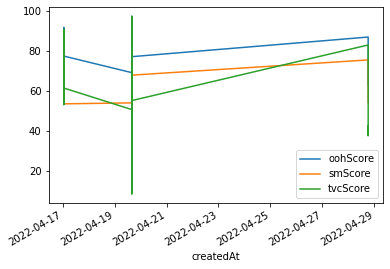

In [272]:
df[['createdAt','oohScore','smScore','tvcScore']].sort_values(by=['createdAt']).set_index('createdAt').plot(y=['oohScore','smScore','tvcScore'])

<AxesSubplot:xlabel='CREATEDAT_COLOR'>

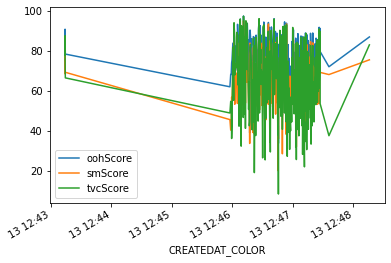

In [271]:
df[['CREATEDAT_COLOR','oohScore','smScore','tvcScore']].sort_values(by=['CREATEDAT_COLOR']).set_index('CREATEDAT_COLOR').plot(y=['oohScore','smScore','tvcScore'])

<AxesSubplot:xlabel='updatedAt'>

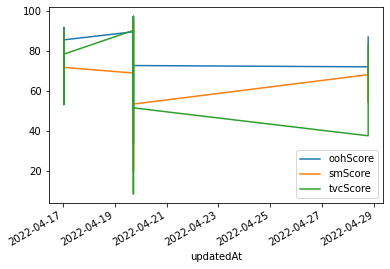

In [274]:
df[['updatedAt','oohScore','smScore','tvcScore']].sort_values(by=['updatedAt']).set_index('updatedAt').plot(y=['oohScore','smScore','tvcScore'])

In [175]:
df.campaignId.loc[df['userId']=='01FX343ZMKRE343QJJY7ETBEJ5'].value_counts()

FDQ01G118Q6Q21TMRRCSVJZ49YFJ8QÑF    275
Name: campaignId, dtype: int64

In [163]:
df.parentAssetTypeId.value_counts()

ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ    876
Name: parentAssetTypeId, dtype: int64

In [170]:
df.loc[df.campaignId.isnull()]['userId'].value_counts()

01FX343ZMKRE343QJJY7ETBEJ5    555
Name: userId, dtype: int64

In [174]:
df.campaignId.loc[df['userId']=='01FX343ZMKRE343QJJY7ETBEJ5'].value_counts()

FDQ01G118Q6Q21TMRRCSVJZ49YFJ8QÑF    275
Name: campaignId, dtype: int64

After checking the column Filename we can see that it got "valuable" information, or at least I though it 

In [137]:
df.Filename.str.split('_',expand=True).iloc[:,0].value_counts()

dukes                419
knorr                273
heinz                136
Duke's Mayonnaise     46
bensoriginalusa        2
Name: 0, dtype: int64

But after checking the BrandId Column I notice it is just the same Information

In [139]:
df.brandId.value_counts()

ARÑ01G1183KRNFW4MH52KVBVY2KX3PD3    419
DDN01G118PW1JKFN915J6FY9B2GXQ132    275
ARE01G1181F9W2HYK675JR5GMQDN610E    136
3NI01G0TFKQ92939A7QXQQZNKGZ2T2D0     46
Name: brandId, dtype: int64

# TENEMOS DOS TIPOS DE ANALISIS, 1) INFLUENCIA DEL COLOR Y COLOR PODERADO EN LOS RESULTADOS DE LA CAMPAÑA, 
# 2) INFLUENCIA DE LOS TIPOS DE PLATAFORMA EN LOS RESULTADOS

In [303]:
Query="""SELECT * FROM ASSET_TYPE AT
INNER JOIN ASSET A ON A.PARENTASSETTYPEID=AT.PARENTID"""
test=pd.read_sql(Query,con=conn)
test

,id,createdAt,updatedAt,name,parentId,name,createdAt,updatedAt,id,campaignId,...,smScore,tvcScore,widthPx,heightPx,userId,deletedAt,status,parentAssetTypeId,publishedAt,scraped
0,01FX34K9DD0FMCQ1P50Z3GQ8TC,2022-03-07 22:26:25.76405,2022-03-07 22:26:25.76405,TikTok,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,01FXAJK4PEVTHAVBW0MDERZNXMbrightness_increase.png,2022-06-03 18:20:51.45131,2022-06-03 18:21:05.515447,IPE01G4NCRX9ME7303CM2DZRBPQQZ1DA,DAA01G2D0D7A837E3YVMFPHMDPGDX3AR,...,68.1750,87.6527,250,349,01FXJD3C6678VN2NJZ6BCWGSQM,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-06-03 18:20:51.45131,0
1,01FX34K9DD0FMCQ1P50Z3GQ8TC,2022-03-07 22:26:25.76405,2022-03-07 22:26:25.76405,TikTok,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,01FYCXR2XKJ57V5TVZ4XKGMQA9.mp4,2022-05-26 19:21:01.887677,2022-05-26 19:23:00.886545,13101G40X1B3XCMNFK3BY7VWT0R3X230,FES01FX338ZYZFNNM8KN1ZBQYA9RKF95,...,68.5125,70.7545,1280,720,01FXJD3C6678VN2NJZ6BCWGSQM,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-05-26 19:21:01.887677,0
2,01FX34K9DD0FMCQ1P50Z3GQ8TC,2022-03-07 22:26:25.76405,2022-03-07 22:26:25.76405,TikTok,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,01FYM2SK8ZDSC6T177C6ZQQHMJ.png,2022-06-03 18:23:54.116726,2022-06-03 18:24:07.400441,RF101G4NCYFNVCJCGMY2Z5W2DRT3MNPD,DAA01G2D0D7A837E3YVMFPHMDPGDX3AR,...,67.5500,87.6527,225,225,01FXJD3C6678VN2NJZ6BCWGSQM,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-06-03 18:23:54.116726,0
3,01FX34K9DD0FMCQ1P50Z3GQ8TC,2022-03-07 22:26:25.76405,2022-03-07 22:26:25.76405,TikTok,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,01FYM2SK8ZJ1V25QVBWETMXBF2.png,2022-06-03 18:23:54.12252,2022-06-03 18:24:13.891366,F2I01G4NCYFP4BNFK6CCNKQG482P2QDA,DAA01G2D0D7A837E3YVMFPHMDPGDX3AR,...,69.7750,95.0818,295,149,01FXJD3C6678VN2NJZ6BCWGSQM,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-06-03 18:23:54.12252,0
4,01FX34K9DD0FMCQ1P50Z3GQ8TC,2022-03-07 22:26:25.76405,2022-03-07 22:26:25.76405,TikTok,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,01FYSRFX4DXS1VKQ6P3Q65QAAM_thumbnail.jpg,2022-06-03 18:18:48.025105,2022-06-03 18:19:13.606541,EAÑ01G4NCN4RYX8K0A5J116KFXBXKDDF,DAA01G2D0D7A837E3YVMFPHMDPGDX3AR,...,62.9125,85.6964,240,240,01FXJD3C6678VN2NJZ6BCWGSQM,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-06-03 18:18:48.025105,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,01FX34K9DDZXE2TC4XX09HY08Z,2022-03-07 22:26:25.76405,2022-03-07 22:26:25.76405,Key visual,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,wallsicecream_2132668737220127283_1568453946.jpg,2022-04-19 13:01:38.303079,2022-04-19 13:26:55.194051,DPA01G10YM1TJQ9HB9BHKSSSRFRQYO30,None,...,68.5125,73.4673,1440,1440,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2019-09-14 06:39:06,0
6351,01FX34K9DDZXE2TC4XX09HY08Z,2022-03-07 22:26:25.76405,2022-03-07 22:26:25.76405,Key visual,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,wallsicecream_2133430996229694246_1568544815.jpg,2022-04-19 13:01:38.462312,2022-04-19 13:26:55.192577,0D101G10YM1TK4AKFACMJ3HHS9KGD1OF,None,...,53.8000,23.7673,1223,1223,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2019-09-15 07:53:35,0
6352,01FX34K9DDZXE2TC4XX09HY08Z,2022-03-07 22:26:25.76405,2022-03-07 22:26:25.76405,Key visual,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,wallsicecream_2318198639499195186_1590570834.jpg,2022-04-19 13:01:38.470271,2022-04-19 13:26:55.19102,QAD01G10YM1TKT968CBBM5RP66KTR20E,None,...,84.2000,82.8873,921,644,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2020-05-27 06:13:54,0
6353,01FX34K9DDZXE2TC4XX09HY08Z,2022-03-07 22:26:25.76405,2022-03-07 22:26:25.76405,Key visual,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,wallsicecream_2416066619929613413_1602237606.jpg,2022-04-19 13:01:38.401422,2022-04-19 13:26:55.189341,KEN01G10YM1TMHDCG2Y4PCQYQ5102A02,None,...,59.7750,62.3982,640,640,01FX343ZMKRE343QJJY7ETBEJ5,None,PROCESSED,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2020-10-09 07:00:06,0


In [317]:
test.name.iloc[:,0].value_counts()

TikTok                         790
Facebook                       790
TV                             790
YouTube                        790
Google display banners         790
Out of Home                    790
Instagram                      790
Key visual                     790
Brand website                    5
Shelf frame                      5
Stopper                          5
Shelf talker                     5
External ecommerce platform      5
Totem                            5
Stand                            5
Name: name, dtype: int64

In [302]:
test.smScore

False    6355
Name: smScore, dtype: int64

In [68]:
Query="""SELECT * FROM ASSET_ASSET_TYPES AAT
INNER JOIN ASSET_TYPE AT ON AT.ID=AAT.ASSETTYPEID
"""
join1=pd.read_sql(Query,con=conn)
join1

,assetId,assetTypeId,id,createdAt,updatedAt,name,parentId
0,000000003V9KT8GMYWGG98H9H5,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-03-07 22:26:25.76405,2022-03-07 22:26:25.76405,Ads,None
1,000000003VTFWDXMAZF4W4XAP5,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-03-07 22:26:25.76405,2022-03-07 22:26:25.76405,Ads,None
2,000000003VW2X6B0ZG7X7WX9XE,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-03-07 22:26:25.76405,2022-03-07 22:26:25.76405,Ads,None
3,000000003VWVPJ784CG0C6QZD0,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ,2022-03-07 22:26:25.76405,2022-03-07 22:26:25.76405,Ads,None
4,01FR38AQV772BK05E9JZSD19EQ,01FX34K9DDZXE2TC4XX09HY08Z,01FX34K9DDZXE2TC4XX09HY08Z,2022-03-07 22:26:25.76405,2022-03-07 22:26:25.76405,Key visual,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ
...,...,...,...,...,...,...,...
1973,01G6B7PAVVS70B45GJPTP9RTB6,01FX34K9DDWM39GGYPGW2AF32A,01FX34K9DDWM39GGYPGW2AF32A,2022-03-07 22:26:25.76405,2022-03-07 22:26:25.76405,Instagram,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ
1974,01G6NRMHS5TRV3E4DMDBR4JJ3D,01FX34K9DDWM39GGYPGW2AF32A,01FX34K9DDWM39GGYPGW2AF32A,2022-03-07 22:26:25.76405,2022-03-07 22:26:25.76405,Instagram,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ
1975,01G6NRRARJD8RP94PEFS78ZABD,01FX34K9DD3D4X3QKXT3TT69ZE,01FX34K9DD3D4X3QKXT3TT69ZE,2022-03-07 22:26:25.76405,2022-03-07 22:26:25.76405,Facebook,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ
1976,01G6NS34E73BQXY76EXNNJXY34,01FX34K9DD0FMCQ1P50Z3GQ8TC,01FX34K9DD0FMCQ1P50Z3GQ8TC,2022-03-07 22:26:25.76405,2022-03-07 22:26:25.76405,TikTok,ÑAP01FXK6THFM2FDX32PB85GKPRNV1RÑ
